In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fetch the Data 

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')  # or encoding='ISO-8859-1'
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 1. Data Cleanning 

In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)

In [7]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])

In [9]:
## Drop Dublicate values
df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(403)

## 2. EDA

In [10]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x1a3773dd910>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41')])

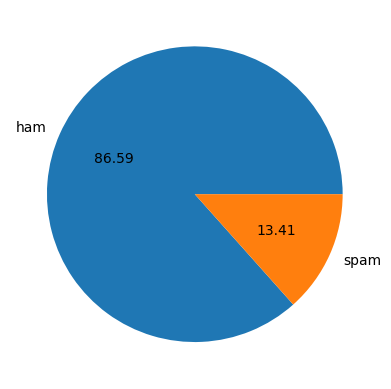

In [11]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [12]:
## Data is Immbalanced
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adarsh1728\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adarsh1728\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
## Number of Character
df['Num_Char'] = df['Text'].apply(lambda x:len(x))
df.head()

,Target,Text,Num_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
## Number of Words
from nltk.tokenize import word_tokenize

df['Num_Words'] = df['Text'].apply(lambda x: len(str(x).split()))  # Ensuring all values are strings


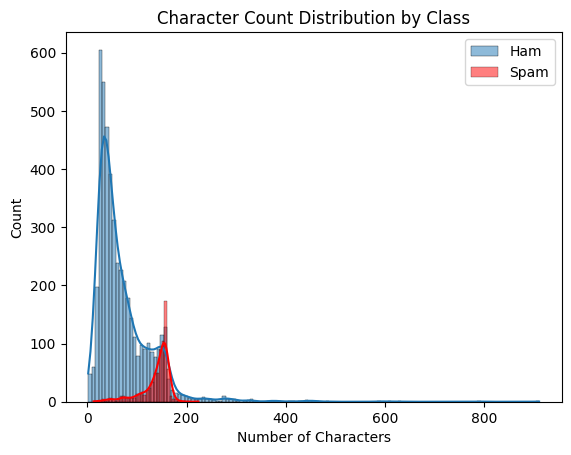

In [15]:
sns.histplot(df[df['Target'] == 0]['Num_Char'], label='Ham',kde=True)
sns.histplot(df[df['Target'] == 1]['Num_Char'], color='red', label='Spam',kde=True)
plt.legend()
plt.xlabel("Number of Characters")
plt.title("Character Count Distribution by Class")
plt.show()

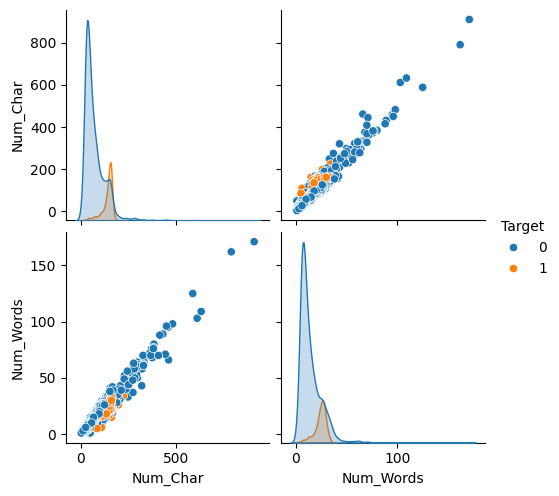

In [15]:
sns.pairplot(df,hue='Target')

## 3. Data Preeprocessing 
#✅ 1. Lowercase

#✅ 2. Tokenization

#✅ 3. Remove Special Characters

#✅ 4. Remove Stopwords

#✅ 5. Stemming

In [16]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = text.split()  # Split into words
    y = [word for word in text if word.isalnum()]  # Keep only alphanumeric words

    text=y[:]
    y.clear()

    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    

    text=y[:]
    y.clear()
    for word in text:
        y.append(ps.stem(word))
        
    return " ".join(y)

df['transform_text']=df['Text'].apply(transform_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adarsh1728\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adarsh1728\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


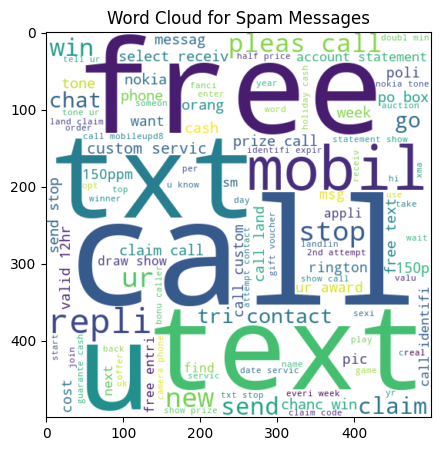

In [17]:
from wordcloud import WordCloud
text1 = df[df['Target'] == 1]['transform_text'].str.cat(sep=" ")
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')
spam_wc=wc.generate(text1)
spam_wc

plt.figure(figsize=(5, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title("Word Cloud for Spam Messages")
plt.show()

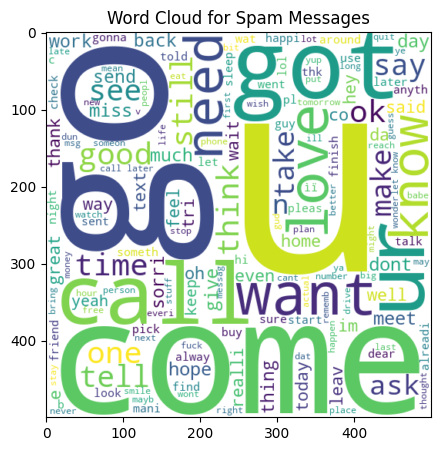

In [18]:
from wordcloud import WordCloud
text2 = df[df['Target'] == 0]['transform_text'].str.cat(sep=" ")
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')
Ham_wc=wc.generate(text2)
Ham_wc

plt.figure(figsize=(5, 5))
plt.imshow(Ham_wc, interpolation='bilinear')
plt.title("Word Cloud for Spam Messages")
plt.show()

## 4 Build Model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer=CountVectorizer()
x=Vectorizer.fit_transform(df['transform_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 5643))

In [20]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 5643))

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score

# Model training
try:
    model = MultinomialNB()
    Vectorizer = CountVectorizer()
    X_train = Vectorizer.fit_transform(["free money", "hello friend", "get cash now", "how are you"])
    y_train = [1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam
    model.fit(X_train, y_train)
    print("Loaded dummy model and vectorizer.")
except Exception as e:
    model, Vectorizer = None, None
    print(f"Dummy load failed: {e}")

Loaded dummy model and vectorizer.


In [23]:
#Pre test spam
spam_Test = ["hey wanna meet up for the game?"]

spam_count = Vectorizer.transform(spam_Test)

model.predict(spam_count)

array([0])

In [24]:
#Pre test ham
ham_Test = ["Reward mony click"]

ham_count = Vectorizer.transform(ham_Test)

model.predict(ham_count)

array([0])

In [25]:
import pickle
pickle.dump(Vectorizer,open('Vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))